In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_excel("../../dataset/First Experiment/Austrian/Austrian(SKG_BRU).xlsx")
df = pd.DataFrame(data)

In [58]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,16:15:00,19:50:00,3,5,1,1,0,110,146.77
1,16:15:00,19:50:00,5,7,1,1,0,220,146.77
2,16:15:00,09:10:00,7,2,1,1,1,110,146.77
3,16:15:00,19:50:00,10,5,1,1,0,110,208.77
4,16:15:00,19:50:00,12,7,1,1,0,110,156.77


In [59]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 9 columns):
departure_time      284 non-null object
arrival_time        284 non-null object
days_before         284 non-null int64
day_of_week         284 non-null int64
num_of_luggage      284 non-null int64
num_of_stops        284 non-null int64
overnight_flight    284 non-null int64
Class               284 non-null int64
price               284 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 20.1+ KB


In [61]:
df.shape

(284, 9)

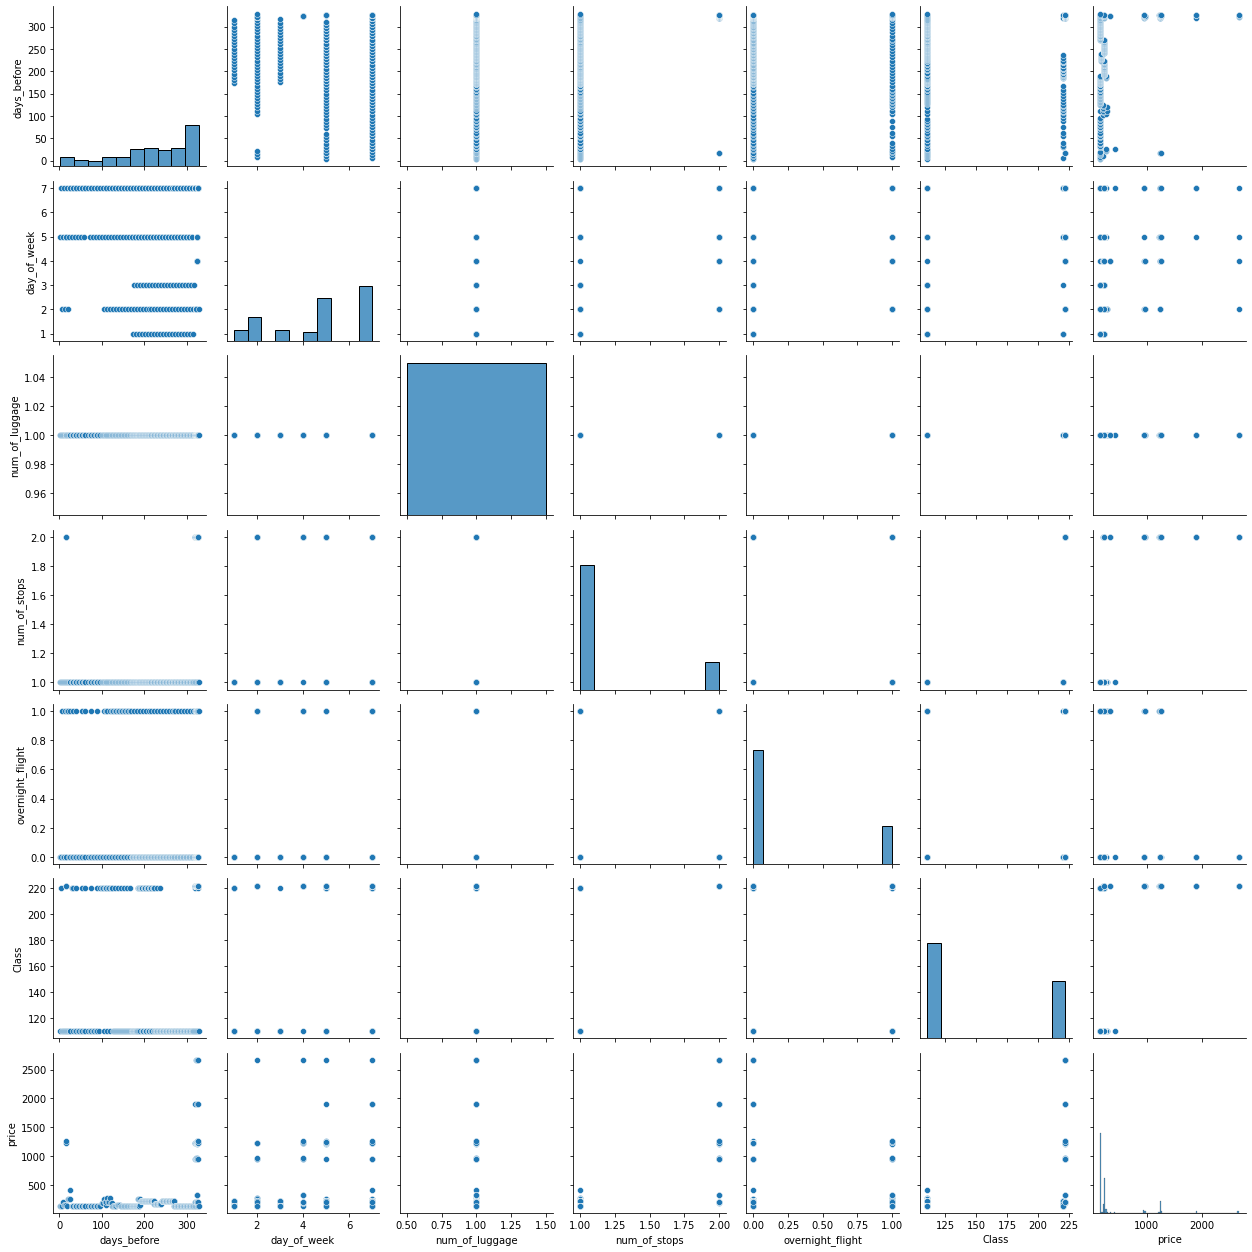

In [62]:
sns.pairplot(df)
plt.tight_layout()

In [63]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [64]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [65]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 16:15:00,1900-01-01 19:50:00,3,5,1,1,0,110,146.77
1,1900-01-01 16:15:00,1900-01-01 19:50:00,5,7,1,1,0,220,146.77
2,1900-01-01 16:15:00,1900-01-01 09:10:00,7,2,1,1,1,110,146.77
3,1900-01-01 16:15:00,1900-01-01 19:50:00,10,5,1,1,0,110,208.77
4,1900-01-01 16:15:00,1900-01-01 19:50:00,12,7,1,1,0,110,156.77


In [66]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [67]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [68]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 16:15:00,1900-01-01 19:50:00,3,5,1,1,0,110,146.77,-2208930300000000000,-2208917400000000000
1,1900-01-01 16:15:00,1900-01-01 19:50:00,5,7,1,1,0,220,146.77,-2208930300000000000,-2208917400000000000
2,1900-01-01 16:15:00,1900-01-01 09:10:00,7,2,1,1,1,110,146.77,-2208930300000000000,-2208955800000000000
3,1900-01-01 16:15:00,1900-01-01 19:50:00,10,5,1,1,0,110,208.77,-2208930300000000000,-2208917400000000000
4,1900-01-01 16:15:00,1900-01-01 19:50:00,12,7,1,1,0,110,156.77,-2208930300000000000,-2208917400000000000


In [69]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [70]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [71]:
del df['departuretime']

In [72]:
del df['arrivaltime']

In [73]:
#df = df.apply(np.int64)

In [74]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,5,3,1,1,0,110,146.77
1,7,5,1,1,0,220,146.77
2,2,7,1,1,1,110,146.77
3,5,10,1,1,0,110,208.77
4,7,12,1,1,0,110,156.77


In [75]:
df.to_csv('skg_bru_proc.csv')

In [76]:
X = df.drop(['price'], axis=1)
y = df['price']

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [79]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [80]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [81]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6926775087007946


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [83]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7048157635181076


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7050961013938692


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7050961013938691


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6983379783372502


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [87]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7050960063441919


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [88]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.12572437992226249


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [89]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4594314578442974


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [90]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [91]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [92]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [93]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [94]:
model = vgg11()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 6, 32)             128       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 6, 64)             6208      
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 6, 128)            41088     
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                38450     
_________________________________________________________________
dense_19 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [95]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 0s 17ms/step - loss: 41966.3008 - val_loss: 1268966.1250
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 20030.9863 - val_loss: 871457.9375
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 15950.8887 - val_loss: 1061444.3750
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 14287.5156 - val_loss: 935388.0625
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 14600.1270 - val_loss: 948440.0625
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 12859.0674 - val_loss: 1065525.3750
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 12471.4980 - val_loss: 967816.4375
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 12058.6055 - val_loss: 982721.8750
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 11724.6846 - val_loss: 1002470.3125
Epoch 10/200
8/8 [=======================

Epoch 78/200
8/8 [==============================] - 0s 7ms/step - loss: 8374.9570 - val_loss: 926736.1875
Epoch 79/200
8/8 [==============================] - 0s 6ms/step - loss: 7577.6899 - val_loss: 941148.0000
Epoch 80/200
8/8 [==============================] - 0s 6ms/step - loss: 7880.9673 - val_loss: 933381.5000
Epoch 81/200
8/8 [==============================] - 0s 6ms/step - loss: 7581.4043 - val_loss: 953774.9375
Epoch 82/200
8/8 [==============================] - 0s 8ms/step - loss: 7494.1323 - val_loss: 915423.1875
Epoch 83/200
8/8 [==============================] - 0s 7ms/step - loss: 8155.1621 - val_loss: 958876.9375
Epoch 84/200
8/8 [==============================] - 0s 7ms/step - loss: 7508.2197 - val_loss: 929122.5000
Epoch 85/200
8/8 [==============================] - 0s 6ms/step - loss: 7986.0811 - val_loss: 929490.2500
Epoch 86/200
8/8 [==============================] - 0s 7ms/step - loss: 7477.5547 - val_loss: 925750.1875
Epoch 87/200
8/8 [============================

In [96]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.11020485711916095


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [97]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [98]:
model = vgg13()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 6, 16)             64        
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 6, 32)             1568      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 6, 64)             10304     
_________________________________________________________________
flatten_7 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                19250     
_________________________________________________________________
dense_22 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [99]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 0s 16ms/step - loss: 43149.3906 - val_loss: 1323246.6250
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 22943.0898 - val_loss: 937508.1250
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 17620.2227 - val_loss: 910954.7500
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 14581.5449 - val_loss: 1003957.0625
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 13497.8096 - val_loss: 1009969.1250
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 12851.3857 - val_loss: 953582.4375
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 12584.3428 - val_loss: 978958.7500
Epoch 8/200
8/8 [==============================] - 0s 6ms/step - loss: 12323.1611 - val_loss: 983820.6250
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 12359.3594 - val_loss: 987882.1250
Epoch 10/200
8/8 [========================

Epoch 78/200
8/8 [==============================] - 0s 6ms/step - loss: 9449.0078 - val_loss: 916918.8125
Epoch 79/200
8/8 [==============================] - 0s 6ms/step - loss: 9443.7900 - val_loss: 976638.3125
Epoch 80/200
8/8 [==============================] - 0s 6ms/step - loss: 9075.3447 - val_loss: 958802.8750
Epoch 81/200
8/8 [==============================] - 0s 6ms/step - loss: 8979.2188 - val_loss: 993591.7500
Epoch 82/200
8/8 [==============================] - 0s 6ms/step - loss: 8863.3496 - val_loss: 979669.0625
Epoch 83/200
8/8 [==============================] - 0s 6ms/step - loss: 9030.2822 - val_loss: 962701.5000
Epoch 84/200
8/8 [==============================] - 0s 7ms/step - loss: 8847.9795 - val_loss: 983195.1875
Epoch 85/200
8/8 [==============================] - 0s 6ms/step - loss: 8943.4971 - val_loss: 931354.1875
Epoch 86/200
8/8 [==============================] - 0s 6ms/step - loss: 10551.7217 - val_loss: 1011511.4375
Epoch 87/200
8/8 [==========================

In [100]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.1362195214770815


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [101]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 6, 16)             64        
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 6, 32)             1568      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 6, 64)             10304     
_________________________________________________________________
flatten_8 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                19250     
_________________________________________________________________
dense_25 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                

In [102]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
8/8 [==============================] - 0s 31ms/step - loss: 37971.7500 - val_loss: 1255801.5000
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 21322.0840 - val_loss: 918928.5625
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 19409.7305 - val_loss: 987986.8750
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 16928.0410 - val_loss: 1050193.3750
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 15444.1045 - val_loss: 956831.3750
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 14237.2305 - val_loss: 1015219.0000
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 13708.3779 - val_loss: 966246.1875
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 13461.5322 - val_loss: 997492.0000
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 12992.4111 - val_loss: 999227.3125
Epoch 10/200
8/8 [========================

Epoch 78/200
8/8 [==============================] - 0s 7ms/step - loss: 7746.7720 - val_loss: 951378.5000
Epoch 79/200
8/8 [==============================] - 0s 6ms/step - loss: 7720.3613 - val_loss: 955803.2500
Epoch 80/200
8/8 [==============================] - ETA: 0s - loss: 2307.66 - 0s 6ms/step - loss: 7541.9106 - val_loss: 976046.0625
Epoch 81/200
8/8 [==============================] - 0s 7ms/step - loss: 7578.0649 - val_loss: 936226.2500
Epoch 82/200
8/8 [==============================] - 0s 6ms/step - loss: 7795.5527 - val_loss: 964008.0000
Epoch 83/200
8/8 [==============================] - 0s 6ms/step - loss: 7484.8174 - val_loss: 953453.8750
Epoch 84/200
8/8 [==============================] - 0s 6ms/step - loss: 7710.4238 - val_loss: 935615.2500
Epoch 85/200
8/8 [==============================] - 0s 7ms/step - loss: 7504.0122 - val_loss: 927526.7500
Epoch 86/200
8/8 [==============================] - 0s 6ms/step - loss: 7617.7515 - val_loss: 975821.0625
Epoch 87/200
8/8 [==

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [103]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 6, 64)             256       
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_9 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                154850    
_________________________________________________________________
dense_28 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [104]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
8/8 [==============================] - 0s 17ms/step - loss: 28929.9551 - val_loss: 899557.9375
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 15622.3525 - val_loss: 956242.9375
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 13029.4990 - val_loss: 958500.6875
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 12438.4629 - val_loss: 1012323.9375
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 12259.1895 - val_loss: 956019.2500
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 11738.7568 - val_loss: 955427.0625
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 12251.8955 - val_loss: 1098421.2500
Epoch 8/200
8/8 [==============================] - 0s 6ms/step - loss: 11854.8604 - val_loss: 906594.6875
Epoch 9/200
8/8 [==============================] - 0s 6ms/step - loss: 11091.6045 - val_loss: 1043030.4375
Epoch 10/200
8/8 [========================

Epoch 78/200
8/8 [==============================] - 0s 5ms/step - loss: 6622.7324 - val_loss: 1023166.6875
Epoch 79/200
8/8 [==============================] - 0s 6ms/step - loss: 8724.1406 - val_loss: 946897.5625
Epoch 80/200
8/8 [==============================] - 0s 6ms/step - loss: 8355.3135 - val_loss: 1009458.2500
Epoch 81/200
8/8 [==============================] - 0s 6ms/step - loss: 6869.5078 - val_loss: 949801.8125
Epoch 82/200
8/8 [==============================] - 0s 6ms/step - loss: 6190.1152 - val_loss: 976960.9375
Epoch 83/200
8/8 [==============================] - 0s 6ms/step - loss: 6356.7842 - val_loss: 1008663.8750
Epoch 84/200
8/8 [==============================] - 0s 6ms/step - loss: 5714.7729 - val_loss: 966253.0625
Epoch 85/200
8/8 [==============================] - 0s 6ms/step - loss: 5660.0635 - val_loss: 1009867.8750
Epoch 86/200
8/8 [==============================] - 0s 5ms/step - loss: 5802.2983 - val_loss: 942699.2500
Epoch 87/200
8/8 [========================

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [105]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_10 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_31 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_32 (Dense)             (None, 1)               

In [106]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
8/8 [==============================] - 0s 17ms/step - loss: 47006.1641 - val_loss: 1450441.2500
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 41953.8242 - val_loss: 1395166.3750
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 34885.3672 - val_loss: 1285121.0000
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 23624.6309 - val_loss: 1079555.1250
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 16379.4365 - val_loss: 908707.8125
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 15296.0625 - val_loss: 1005220.1875
Epoch 7/200
8/8 [==============================] - 0s 7ms/step - loss: 14509.7363 - val_loss: 998388.2500
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 14076.4141 - val_loss: 958737.5625
Epoch 9/200
8/8 [==============================] - 0s 6ms/step - loss: 13467.4746 - val_loss: 977322.3750
Epoch 10/200
8/8 [======================

8/8 [==============================] - 0s 6ms/step - loss: 7787.7764 - val_loss: 949378.5000
Epoch 154/200
8/8 [==============================] - 0s 6ms/step - loss: 7742.8335 - val_loss: 925260.4375
Epoch 155/200
8/8 [==============================] - 0s 6ms/step - loss: 7661.4458 - val_loss: 973712.1875
Epoch 156/200
8/8 [==============================] - 0s 6ms/step - loss: 7640.4214 - val_loss: 928174.3125
Epoch 157/200
8/8 [==============================] - 0s 7ms/step - loss: 7751.0977 - val_loss: 973709.0000
Epoch 158/200
8/8 [==============================] - 0s 6ms/step - loss: 7716.4443 - val_loss: 986250.6875
Epoch 159/200
8/8 [==============================] - 0s 6ms/step - loss: 7640.8999 - val_loss: 946512.0000
Epoch 160/200
8/8 [==============================] - 0s 7ms/step - loss: 7529.8530 - val_loss: 936631.4375
Epoch 161/200
8/8 [==============================] - 0s 7ms/step - loss: 7546.6040 - val_loss: 946618.1875
Epoch 162/200
8/8 [==============================] 

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [107]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_11 (Flatten)         (None, 6144)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_34 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_35 (Dense)             (None, 1)               

In [108]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
8/8 [==============================] - 0s 20ms/step - loss: 30332.0039 - val_loss: 994291.6250
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 15421.6641 - val_loss: 857137.0000
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 13503.7988 - val_loss: 1046628.5625
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 13132.3115 - val_loss: 1007758.3125
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 13955.7852 - val_loss: 923258.8125
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 12536.5527 - val_loss: 1019978.5000
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 11871.5811 - val_loss: 880798.7500
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 13078.5010 - val_loss: 1016104.0000
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 11605.1641 - val_loss: 1058858.6250
Epoch 10/200
8/8 [=====================

Epoch 154/200
8/8 [==============================] - 0s 8ms/step - loss: 2493.4724 - val_loss: 960480.0000
Epoch 155/200
8/8 [==============================] - 0s 7ms/step - loss: 2325.9595 - val_loss: 892668.7500
Epoch 156/200
8/8 [==============================] - 0s 7ms/step - loss: 2264.6780 - val_loss: 983611.3750
Epoch 157/200
8/8 [==============================] - 0s 7ms/step - loss: 2268.8982 - val_loss: 919507.5000
Epoch 158/200
8/8 [==============================] - 0s 7ms/step - loss: 2507.8203 - val_loss: 912324.9375
Epoch 159/200
8/8 [==============================] - 0s 7ms/step - loss: 2696.1975 - val_loss: 991744.6875
Epoch 160/200
8/8 [==============================] - 0s 7ms/step - loss: 2393.2568 - val_loss: 897898.0625
Epoch 161/200
8/8 [==============================] - 0s 7ms/step - loss: 2143.0854 - val_loss: 951532.6250
Epoch 162/200
8/8 [==============================] - 0s 7ms/step - loss: 2034.7948 - val_loss: 910042.1875
Epoch 163/200
8/8 [==================

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.693
1,Bagging,0.705
2,Gradient Boosting,0.705
3,Decision Tree,0.705
4,Random Forest,0.698
5,Extra Tree,0.705
6,SVR,0.126
7,MLP,0.459
8,VGG11,0.110
9,VGG13,0.136


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

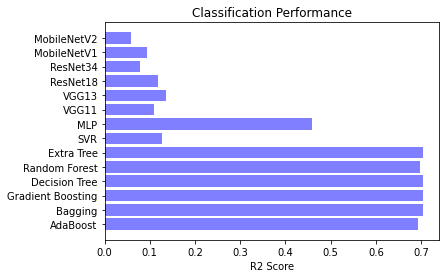

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()